# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
print(f"The number of rows present in the data is: {df.shape[0]} rows.")
print(f"The number of columns present in the data is: {df.shape[1]} columns.")

The number of rows present in the data is: 1898 rows.
The number of columns present in the data is: 9 columns.


#### Observations:
There are **1898 rows** and **9 columns** in the data as evident from the **shape** function of the dataframe which displays the rows and columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The **integer** columns in the above data are: **order_id, customer_id, food_preparation_time, delivery_time**.

The **float** column in the above data is: **cost_of_the_order**.

The **object** columns in the above data are: **restaurant_name, cuisine_type, day_of_the_week, rating**.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
#Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

There is a change to be made. The **rating** for some orders is "**Not given**" but **actual rating** should **range** from **1-5** and **not a string**. So we will change the "**Not given**" to a **NULL value** and then **fill** them with **mean, median, etc.**

But if we **convert** them to **Null** then it will be **difficult** to calculate the **mean** because **str** and **int** addition **not** compatible. So, we **first** check for **rating = 0** in the data.

In [ ]:
df['rating'][df['rating']==0].count()

0

**Since** we can see above that there is **no** rating which is **zero**, we will use **zero** for the **null** values. **Why** did we do this?


---> **Problems to calculate mean**: It was posing a **challenge** to calculate **mean** of the ratings as **null** values are **str** data type.

**Why** check for **zero**?

---> **Suppose** someone rated the food as **0**. We **converted** the **Null** values to **0** as well. Then we will be taking the **mean** of the ratings. So, the **0** given by the **customer** will be **replaced** by **mean** of the ratings (**for example, mean = 3.5**). So its **not justifiable** to the **customer** if their rating **changes** from **0** to **3.5**. So, we need to **modify** our data to our **needs** and also keeping the **customer's self-interest** in mind too.




In [ ]:
df['rating'] = df['rating'].replace('Not given',0)

In [ ]:
df['rating'].head()

0    0
1    0
2    5
3    3
4    4
Name: rating, dtype: object

Now we still **cannot** calculate the **mean** because the data type of **rating** column is **object**. We first **change** it to **integer**.

In [ ]:
df['rating'] = df['rating'].astype(int)

In [ ]:
mean_rating = np.round(df['rating'].mean(),1)
print(mean_rating)

2.7


In [ ]:
# replacing the zeroes with mean
df['rating'] = df['rating'].replace(0,mean_rating)
df['rating'].head()

0    2.7
1    2.7
2    5.0
3    3.0
4    4.0
Name: rating, dtype: float64

#### Observations:
**Zero** amount of **null** values for **every** column **except** rating. It showed **0** before because it was **mentioned** as "**Not given**" instead of **NaN, NA, None, Null, etc**. So some **modifications** were done and **missing** values were **filled** with **mean** of the **rating** column.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898.0,NaN,NaN,NaN,3.706639,0.989267,2.7,2.7,4.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
So there are 178 total restaurants. Shake Shack is the top restaurant where most orders come from. 219 orders from Shake Shack.

### **Question 5:** How many orders are not rated?

Since **not rated** orders are **already** converted to **mean**. Lets show the **amount** of orders with **rating = mean_rating** (i.e. **2.7**).

In [ ]:
# Write the code here
df['rating'][df['rating']==2.7].count()

736

#### Observations:
There are **736** orders that are **not rated** (i.e., **rating** is "**Not given**").

### Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,2.7,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,2.7,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

**For categorical variables:**

For **cuisine_type:**

In [ ]:
frequency_cuisine = df.groupby(['cuisine_type']).size().reset_index(name="Count").rename(columns={'cuisine_type':'Cuisine Type'})
frequency_cuisine

,Cuisine Type,Count
0,American,584
1,Chinese,215
2,French,18
3,Indian,73
4,Italian,298
5,Japanese,470
6,Korean,13
7,Mediterranean,46
8,Mexican,77
9,Middle Eastern,49


The **most** ordered cuisine is **American** with **584** orders and the **least** ordered cuisine is **Vietnamese** with **7** orders.

In [ ]:
hist = px.histogram(df,x="cuisine_type")
hist.show()

In [ ]:
frequency_cuisine['Count%'] = np.round(frequency_cuisine['Count']/sum(frequency_cuisine['Count'])*100,2)
frequency_cuisine

,Cuisine Type,Count,Count%
0,American,584,30.77
1,Chinese,215,11.33
2,French,18,0.95
3,Indian,73,3.85
4,Italian,298,15.70
5,Japanese,470,24.76
6,Korean,13,0.68
7,Mediterranean,46,2.42
8,Mexican,77,4.06
9,Middle Eastern,49,2.58


In [ ]:
frequency_cuisine.sort_values(by=['Count'],ascending=False)

,Cuisine Type,Count,Count%
0,American,584,30.77
5,Japanese,470,24.76
4,Italian,298,15.70
1,Chinese,215,11.33
8,Mexican,77,4.06
3,Indian,73,3.85
9,Middle Eastern,49,2.58
7,Mediterranean,46,2.42
12,Thai,19,1.00
2,French,18,0.95


The **top 4 most** ordered cuisines are **American, Japanese, Italian and Chinese** with **584** orders (**30.77%**), **470** orders (**24.76%**), **298** orders (**15.70%**) and **215** orders (**11.33%**) respectively.

For **restaurant_name**:

In [ ]:
frequency_rest = df.groupby(['restaurant_name']).size().reset_index(name="Count").rename(columns={'restaurant_name':'Restaurant Names'})
frequency_rest

,Restaurant Names,Count
0,'wichcraft,1
1,12 Chairs,4
2,5 Napkin Burger,5
3,67 Burger,1
4,Alidoro,1
...,...,...
173,Zero Otto Nove,2
174,brgr,2
175,da Umberto,3
176,ilili Restaurant,18


In [ ]:
hist1 = px.histogram(df,x="restaurant_name")
hist1.show()

In [ ]:
frequency_rest['Count%'] = np.round(frequency_rest['Count']/sum(frequency_rest['Count'])*100,2)
frequency_rest

,Restaurant Names,Count,Count%
0,'wichcraft,1,0.05
1,12 Chairs,4,0.21
2,5 Napkin Burger,5,0.26
3,67 Burger,1,0.05
4,Alidoro,1,0.05
...,...,...,...
173,Zero Otto Nove,2,0.11
174,brgr,2,0.11
175,da Umberto,3,0.16
176,ilili Restaurant,18,0.95


In [ ]:
frequency_rest.sort_values(by=['Count'],ascending=False)

,Restaurant Names,Count,Count%
136,Shake Shack,219,11.54
153,The Meatball Shop,132,6.95
21,Blue Ribbon Sushi,119,6.27
20,Blue Ribbon Fried Chicken,96,5.06
109,Parm,68,3.58
...,...,...,...
85,Klong,1,0.05
83,Kambi Ramen House,1,0.05
77,Il Bambino,1,0.05
76,Hunan Manor,1,0.05


The **top 3 most** ordered from restaurants are **Shake Shack, The Meatball Shop and Blue Ribbon Sushi** with **219** orders (**11.54%**), **132** orders (**6.95%**) and **119** orders (**6.27%**) respectively.

For **day_of_the_week**:

In [ ]:
frequency_day_week = df.groupby(['day_of_the_week']).size().reset_index(name="Count").rename(columns={'day_of_the_week':'Days of the Week'})
frequency_day_week

,Days of the Week,Count
0,Weekday,547
1,Weekend,1351


In [ ]:
hist2 = px.histogram(df,x="day_of_the_week")
hist2.show()

In [ ]:
frequency_day_week['Count%'] = np.round(frequency_day_week['Count']/sum(frequency_day_week['Count'])*100,2)
frequency_day_week

,Days of the Week,Count,Count%
0,Weekday,547,28.82
1,Weekend,1351,71.18


**Most** orders took place on **Weekends** with **1351** orders (**71.81%**) **whereas** only **547** orders (**28.82%**) took place on **Weekdays**.

For numerical variables:

For **cost_of_the_order**:

In [ ]:
fig1 = px.box(df,x="cost_of_the_order")
fig1.show()

In [ ]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

The **minimum** cost is **4.47 dollars**. The **maximum** cost is **35.41 dollars**. The **mean** cost is **16.50 dollars**. The **standard deviation** is **7.48 dollars**. The **first quartile (Q1)** is **12.08 dollars**. It is the **median** of the **lower half** of the dataset. The **median (Q2)** is **14.14 dollars**. The **third quartile (Q3)** is **22.31 dollars**. It is the **median** of the **upper half** of the dataset. The **Interquartile Range (IQR)** is **10.23 dollars (Q3-Q1)**. There are **no outliers** in the above. The above **data** is **Right-Skewed**.

For **rating:**

In [ ]:
fig2 = px.box(df,x="rating")
fig2.show()

In [ ]:
df['rating'].describe()

count    1898.000000
mean        3.706639
std         0.989267
min         2.700000
25%         2.700000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

The **minimum** rating is **2.70**. The **maximum** rating is **5.00**. The **mean** rating is **3.71**. The **standard deviation** is **1.00**. The **first quartile (Q1)** is **2.70**. It is the **median** of the **lower half** of the dataset. The **median (Q2)** is **4.00**. The **third quartile (Q3)** is **5.00**. It is the **median** of the **upper half** of the dataset. The **Interquartile Range (IQR)** is **2.30 (Q3-Q1)**. There are **no outliers** in the above. The above **data** is **box-plot with no whiskers**.

For **food_preparation_time:**

In [ ]:
fig3 = px.box(df,x="food_preparation_time")
fig3.show()

In [ ]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

The **minimum** time is **20 mins**. The **maximum** time is **35 mins**. The **mean** time is **27.37 mins**. The **standard deviation** is **4.63 mins**. The **first quartile (Q1)** is **23 mins**. It is the **median** of the **lower half** of the dataset. The **median (Q2)** is **27 mins**. The **third quartile (Q3)** is **31 mins**. It is the **median** of the **upper half** of the dataset. The **Interquartile Range (IQR)** is **8 mins (Q3-Q1)**. There are **no outliers** in the above.

For **delivery_time:**

In [ ]:
fig4 = px.box(df,x="delivery_time")
fig4.show()

In [ ]:
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

The **minimum** time is **15 mins**. The **maximum** time is **33 mins**. The **mean** time is **24.16 mins**. The **standard deviation** is **4.97 mins**. The **first quartile (Q1)** is **20 mins**. It is the **median** of the **lower half** of the dataset. The **median (Q2)** is **25 mins**. The **third quartile (Q3)** is **28 mins**. It is the **median** of the **upper half** of the dataset. The **Interquartile Range (IQR)** is **8 mins (Q3-Q1)**. There are **no outliers** in the above. The above **data** is **Left-Skewed**.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
grouped_data = df.groupby(['restaurant_name'])['order_id'].count()
result = grouped_data.sort_values(ascending=False)
result.head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
The **top 5** restaurants **according** to **number of orders received** are **Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm** with the number of orders as **219, 132, 119, 96 and 68** respectively.

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
df['cuisine_type'][df['day_of_the_week']=="Weekend"].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
The **most** **popular** cuisine on **weekends** is **American** food which has **415** orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
number_of_orders_above_20d = df['order_id'][df['cost_of_the_order']>20.00].count()
total_number_of_orders = df['order_id'].shape[0]
percentage_of_orders_above_20d = np.round((number_of_orders_above_20d/total_number_of_orders)*100,2)
f"{percentage_of_orders_above_20d} %"

'29.24 %'

#### Observations:
The **percentage** of the orders that **cost** more than **20** dollars is **29.24%**.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
f"{np.round(df['delivery_time'].mean(),2)} mins."

'24.16 mins.'

#### Observations:
The **mean** order delivery time is **24.16 mins**.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
group_data1 = df.groupby(['customer_id'])['order_id'].count()
result1 = group_data1.sort_values(ascending=False)
result1.head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:
The **top 3 most frequent** customers are with the customer id as **52832, 47440** and **83287** with **13, 10** and **9** orders respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

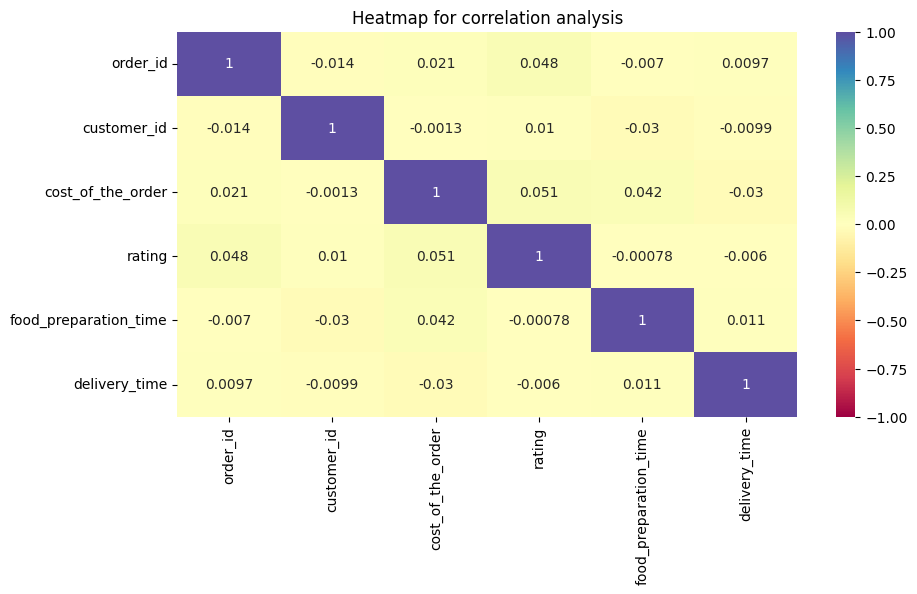

In [ ]:
# Write the code here
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="Spectral",vmin=-1,vmax=1)
plt.title("Heatmap for correlation analysis")
plt.show()

**Scatterplot (Numerical - Numerical)**:

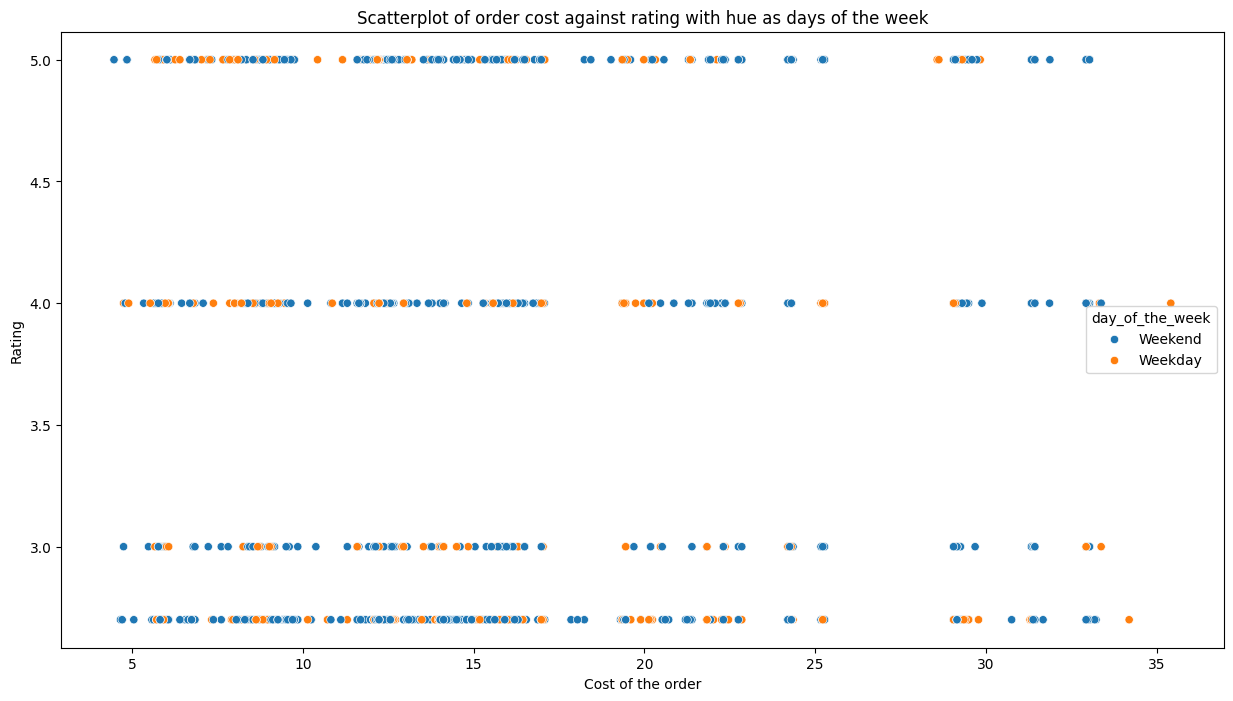

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['cost_of_the_order'],y=df['rating'],hue=df['day_of_the_week'])
plt.title("Scatterplot of order cost against rating with hue as days of the week")
plt.xlabel("Cost of the order")
plt.ylabel("Rating")
plt.show()

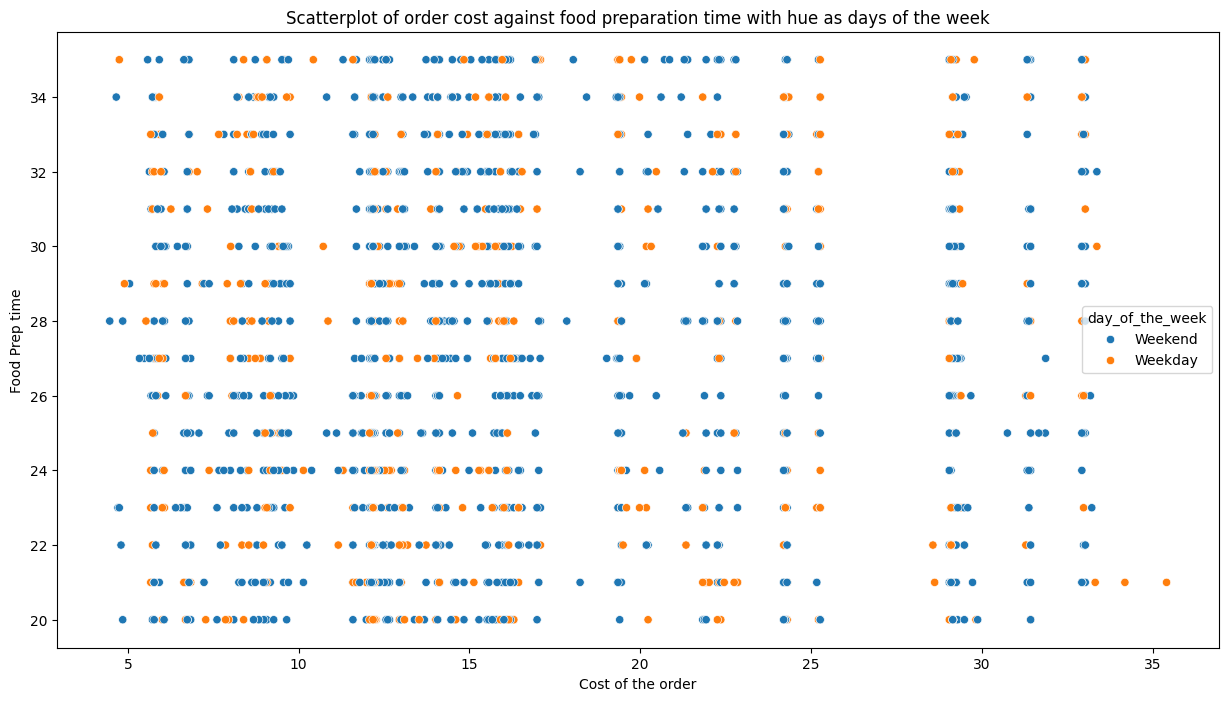

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['cost_of_the_order'],y=df['food_preparation_time'],hue=df['day_of_the_week'])
plt.title("Scatterplot of order cost against food preparation time with hue as days of the week")
plt.xlabel("Cost of the order")
plt.ylabel("Food Prep time")
plt.show()

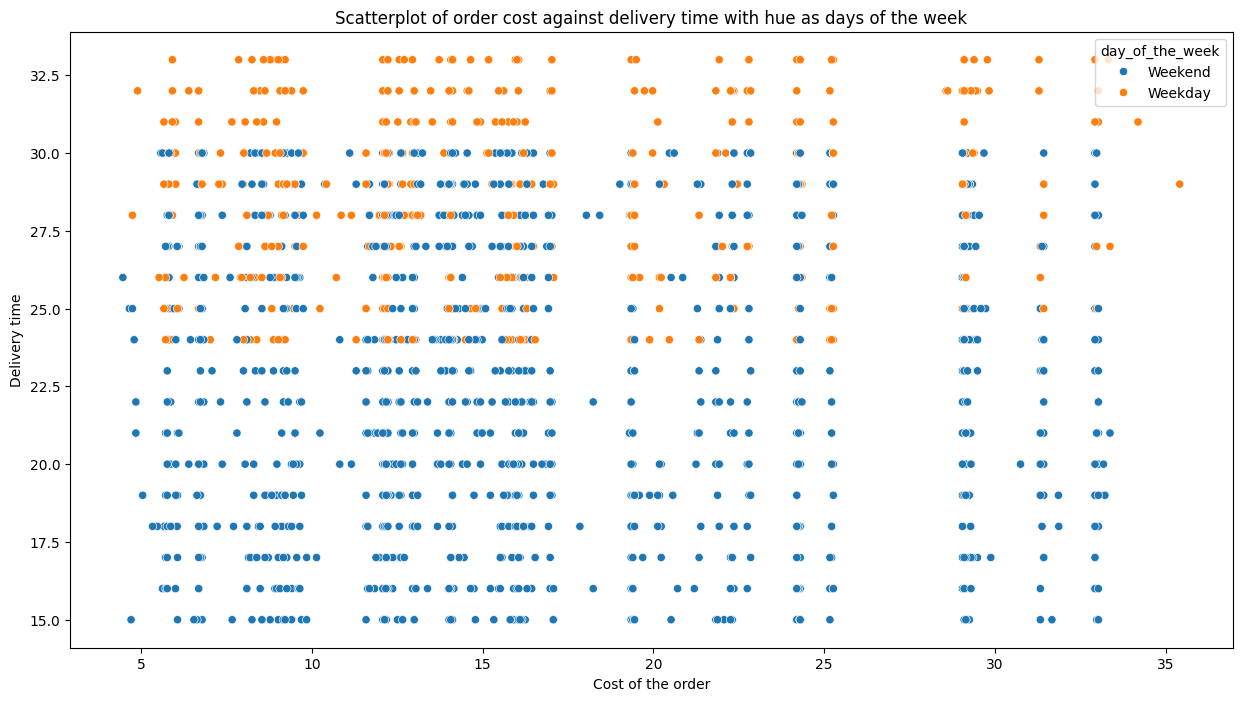

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['cost_of_the_order'],y=df['delivery_time'],hue=df['day_of_the_week'])
plt.title("Scatterplot of order cost against delivery time with hue as days of the week")
plt.xlabel("Cost of the order")
plt.ylabel("Delivery time")
plt.show()

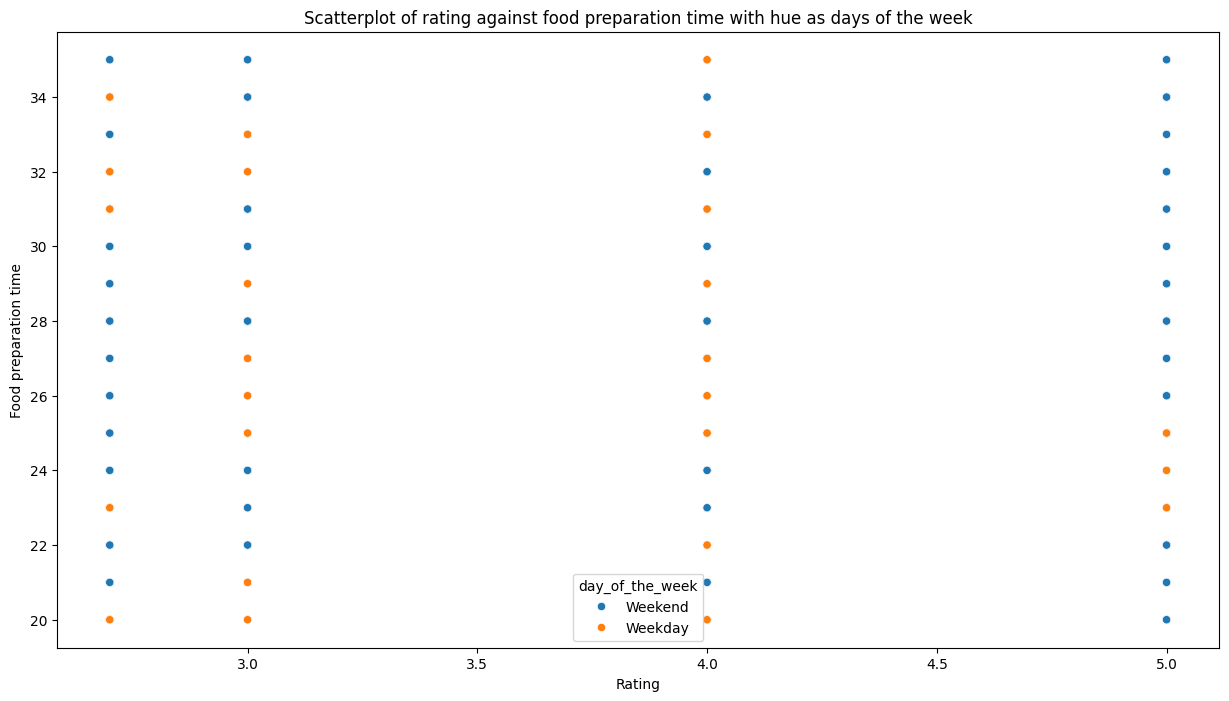

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['rating'],y=df['food_preparation_time'],hue=df['day_of_the_week'])
plt.title("Scatterplot of rating against food preparation time with hue as days of the week")
plt.xlabel("Rating")
plt.ylabel("Food preparation time")
plt.show()

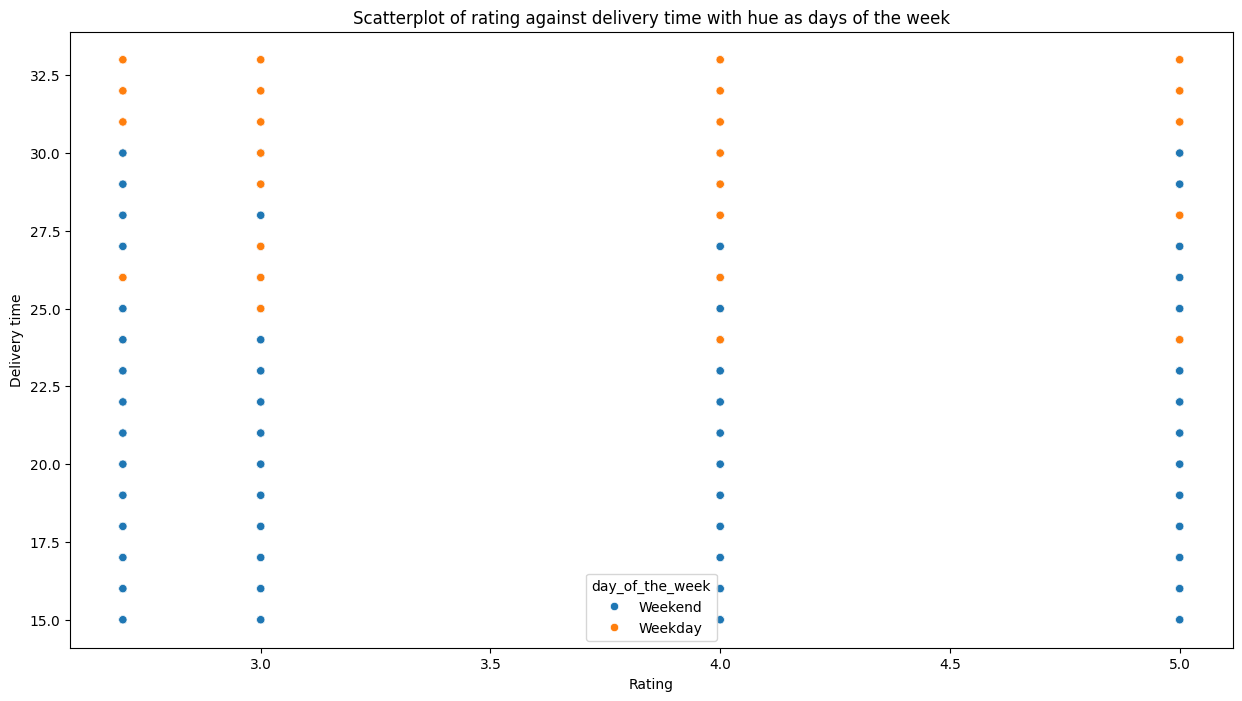

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['rating'],y=df['delivery_time'],hue=df['day_of_the_week'])
plt.title("Scatterplot of rating against delivery time with hue as days of the week")
plt.xlabel("Rating")
plt.ylabel("Delivery time")
plt.show()

**Barplot (Numerical - Categorical):**

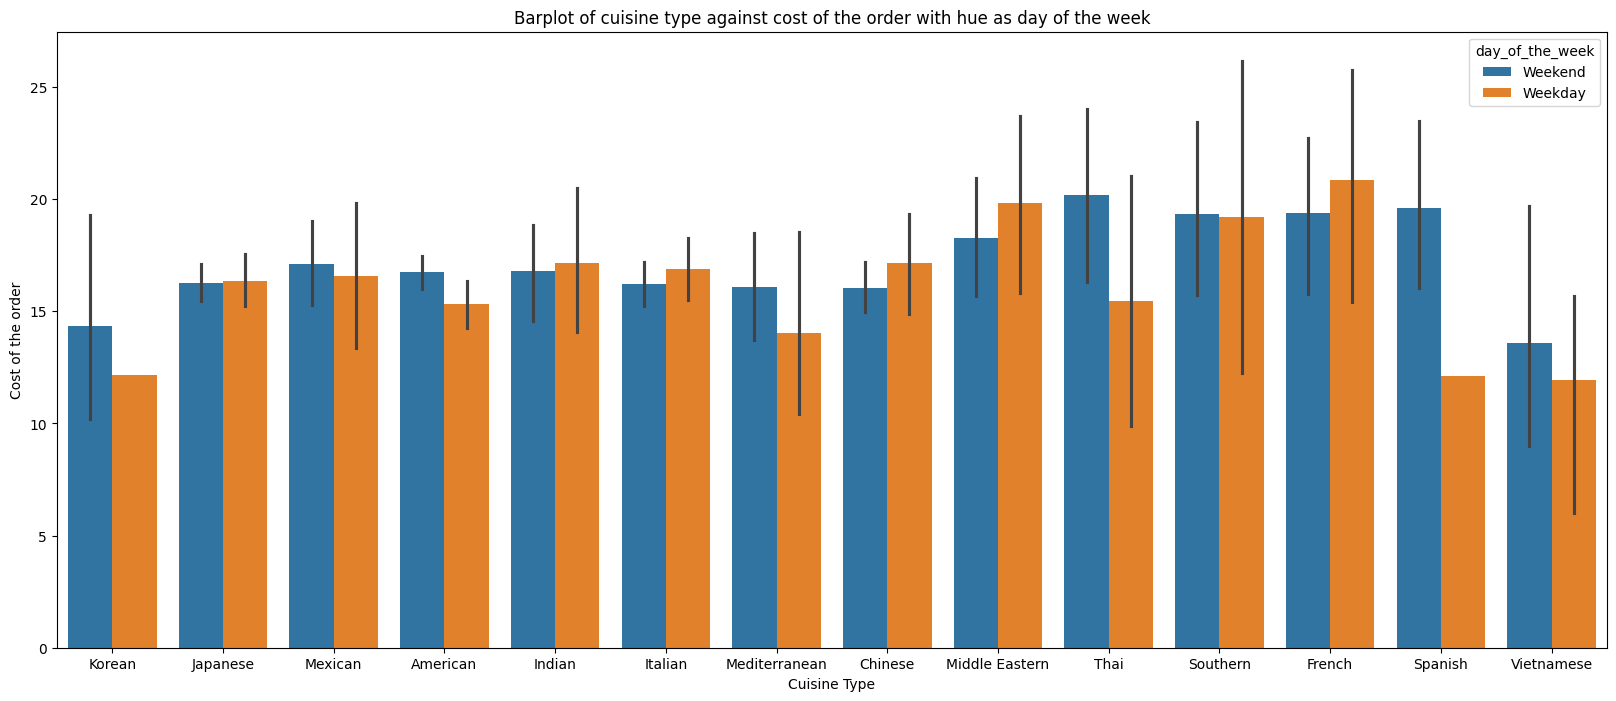

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['cuisine_type'],y=df['cost_of_the_order'],hue=df['day_of_the_week'])
plt.title("Barplot of cuisine type against cost of the order with hue as day of the week")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the order")
plt.show()

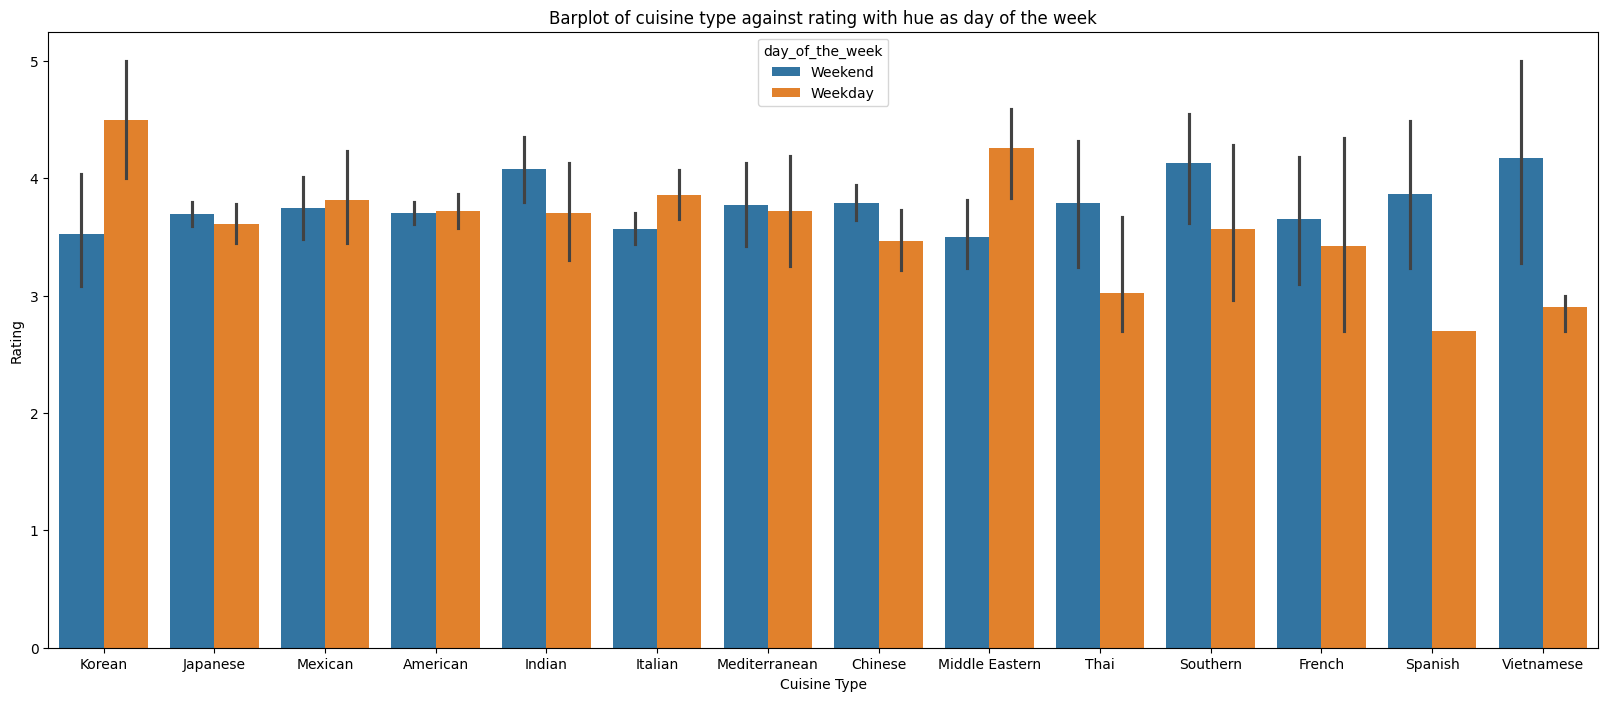

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['cuisine_type'],y=df['rating'],hue=df['day_of_the_week'])
plt.title("Barplot of cuisine type against rating with hue as day of the week")
plt.xlabel("Cuisine Type")
plt.ylabel("Rating")
plt.show()

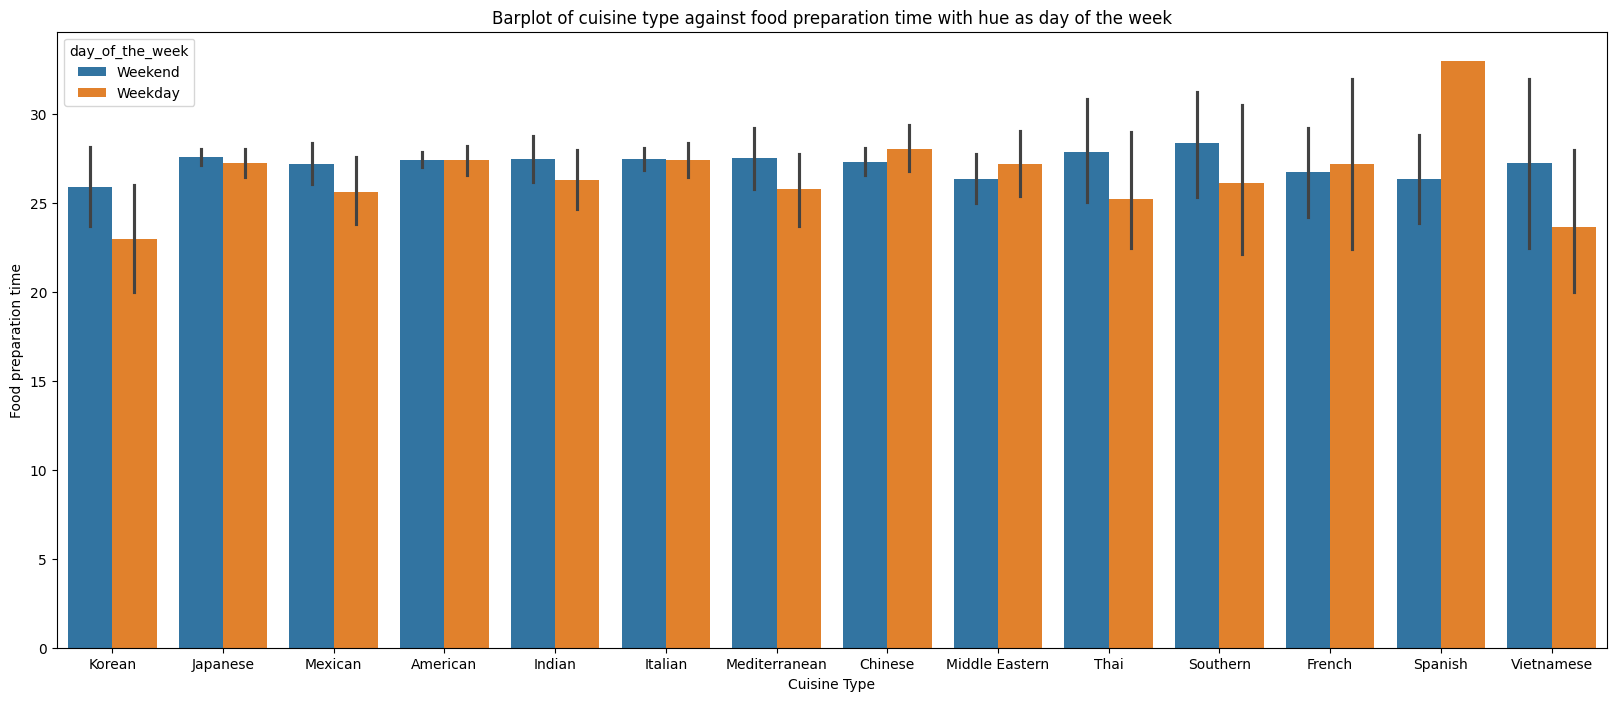

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['cuisine_type'],y=df['food_preparation_time'],hue=df['day_of_the_week'])
plt.title("Barplot of cuisine type against food preparation time with hue as day of the week")
plt.xlabel("Cuisine Type")
plt.ylabel("Food preparation time")
plt.show()

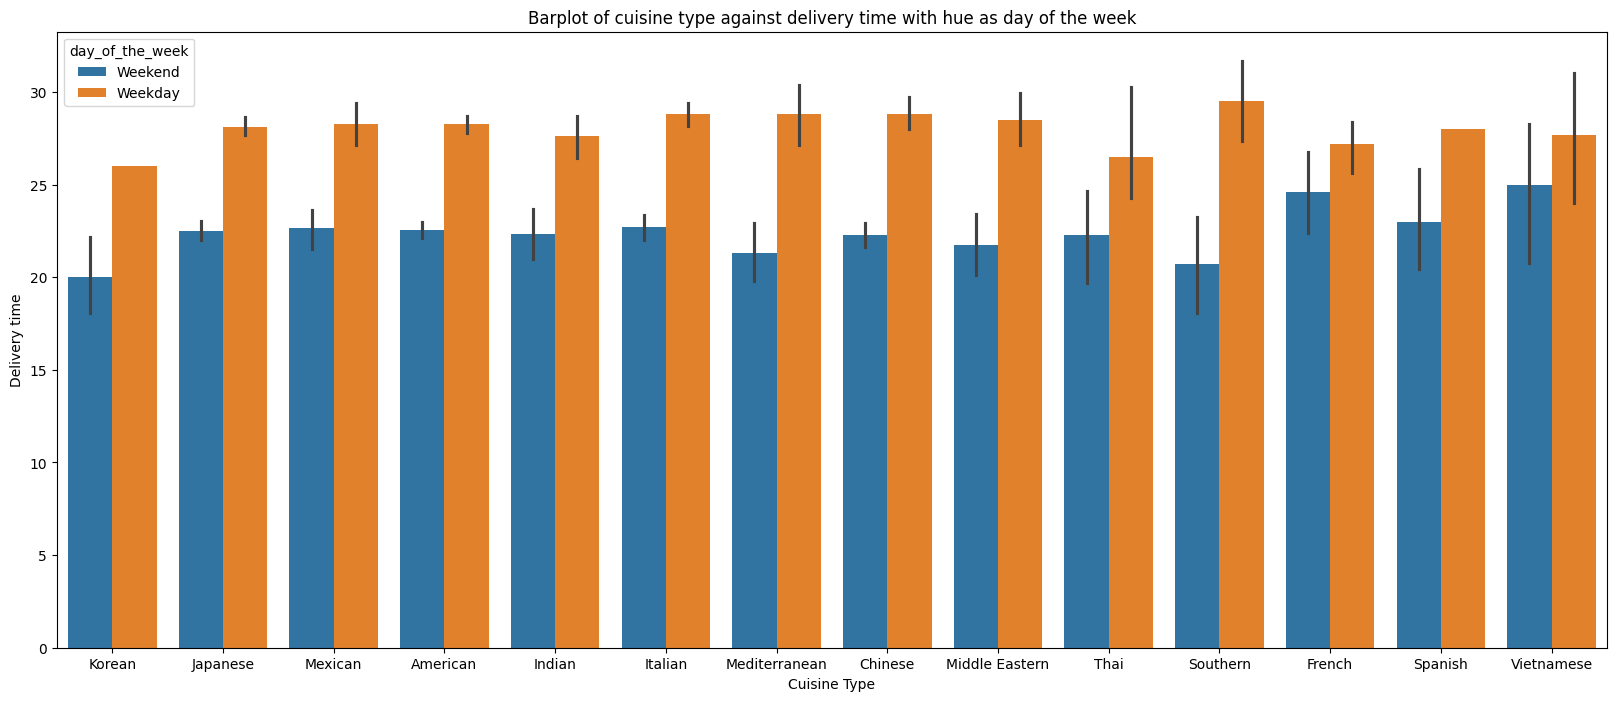

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['cuisine_type'],y=df['delivery_time'],hue=df['day_of_the_week'])
plt.title("Barplot of cuisine type against delivery time with hue as day of the week")
plt.xlabel("Cuisine Type")
plt.ylabel("Delivery time")
plt.show()

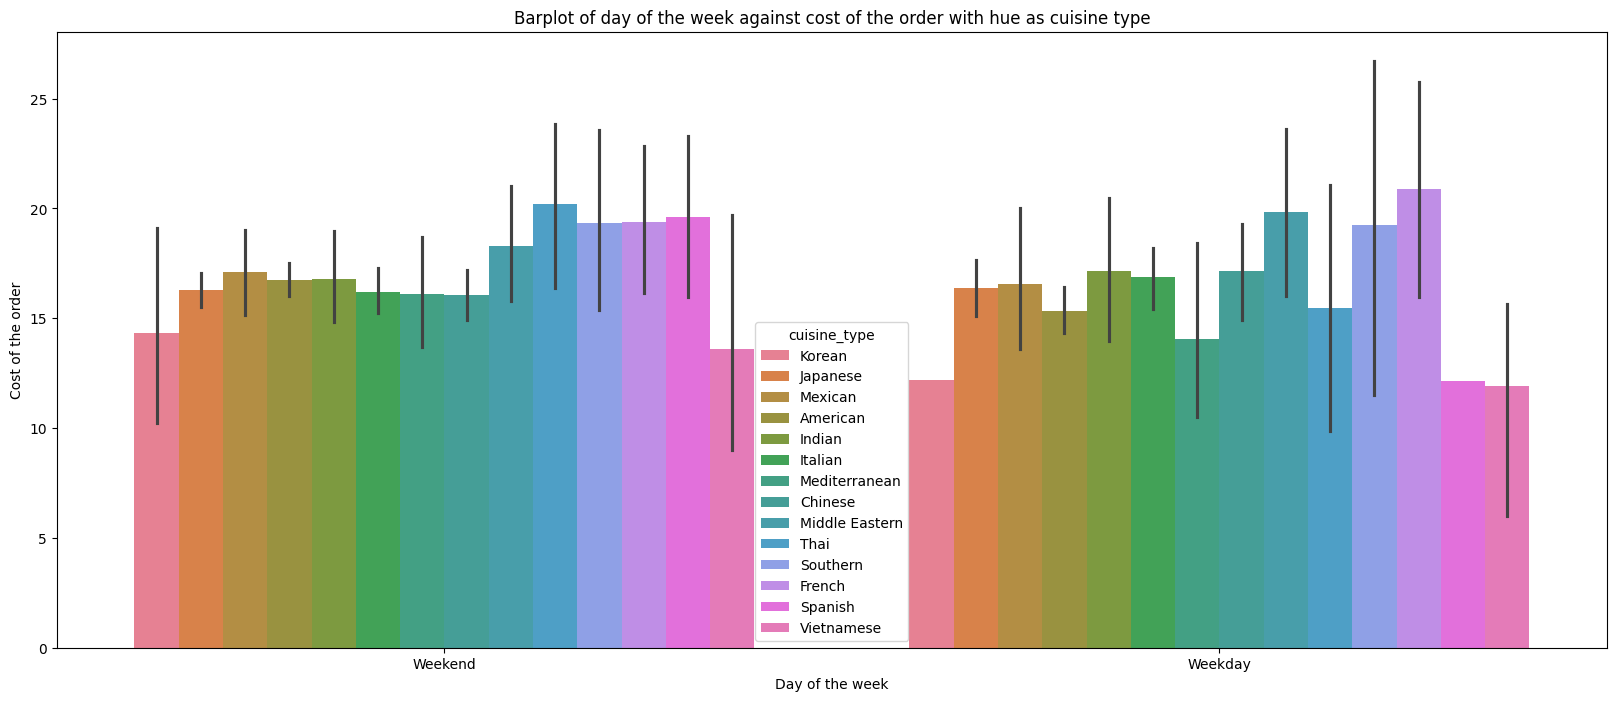

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['day_of_the_week'],y=df['cost_of_the_order'],hue=df['cuisine_type'])
plt.title("Barplot of day of the week against cost of the order with hue as cuisine type")
plt.xlabel("Day of the week")
plt.ylabel("Cost of the order")
plt.show()

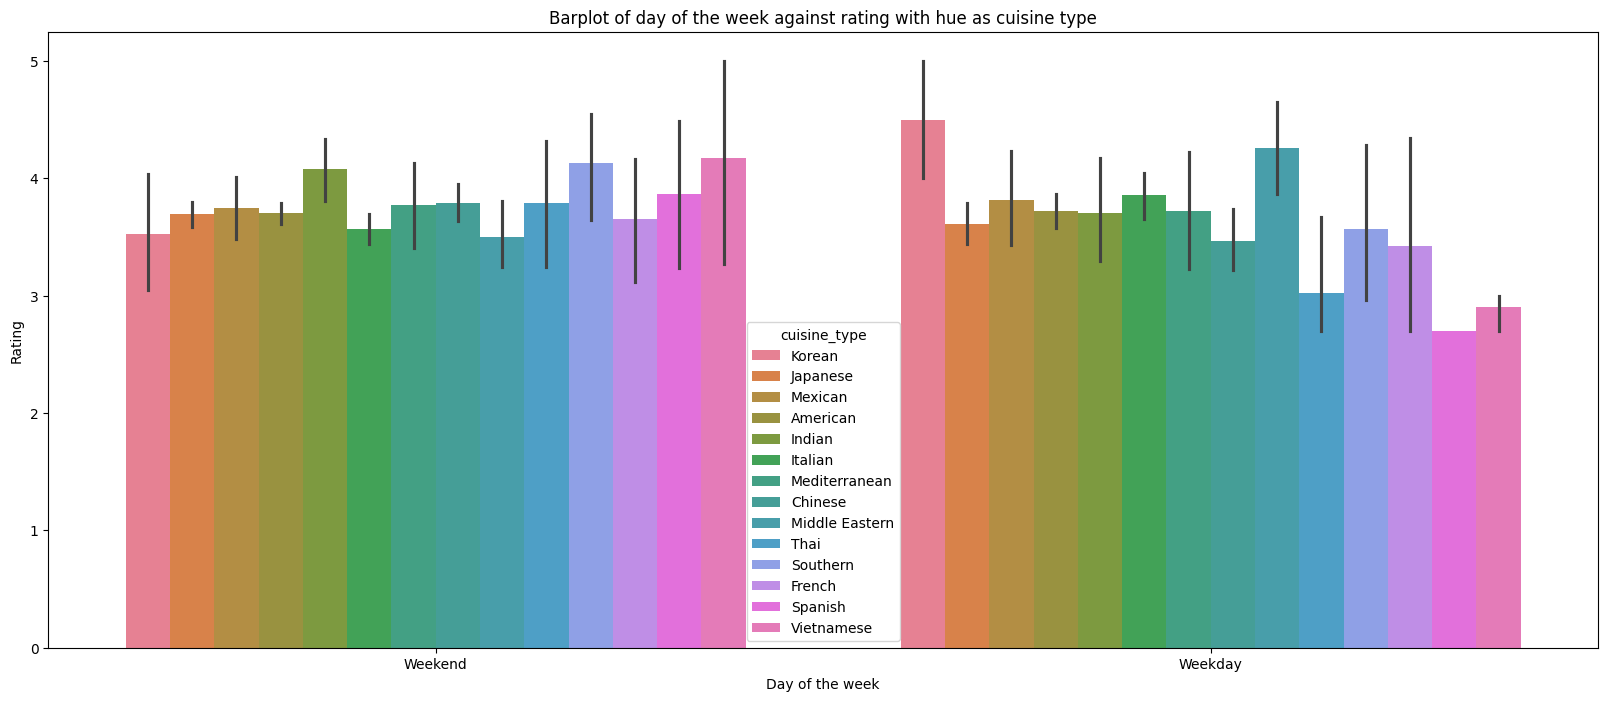

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['day_of_the_week'],y=df['rating'],hue=df['cuisine_type'])
plt.title("Barplot of day of the week against rating with hue as cuisine type")
plt.xlabel("Day of the week")
plt.ylabel("Rating")
plt.show()

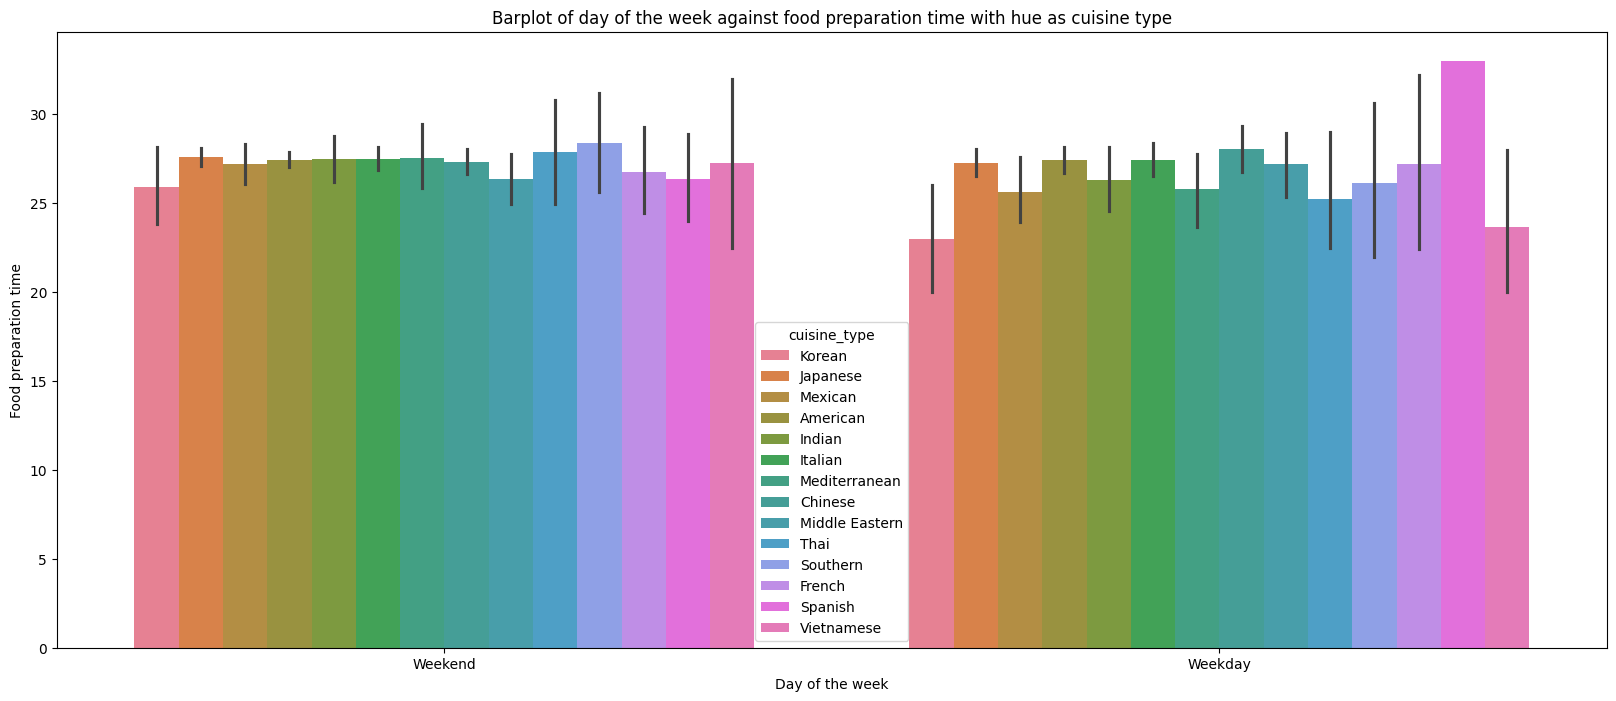

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['day_of_the_week'],y=df['food_preparation_time'],hue=df['cuisine_type'])
plt.title("Barplot of day of the week against food preparation time with hue as cuisine type")
plt.xlabel("Day of the week")
plt.ylabel("Food preparation time")
plt.show()

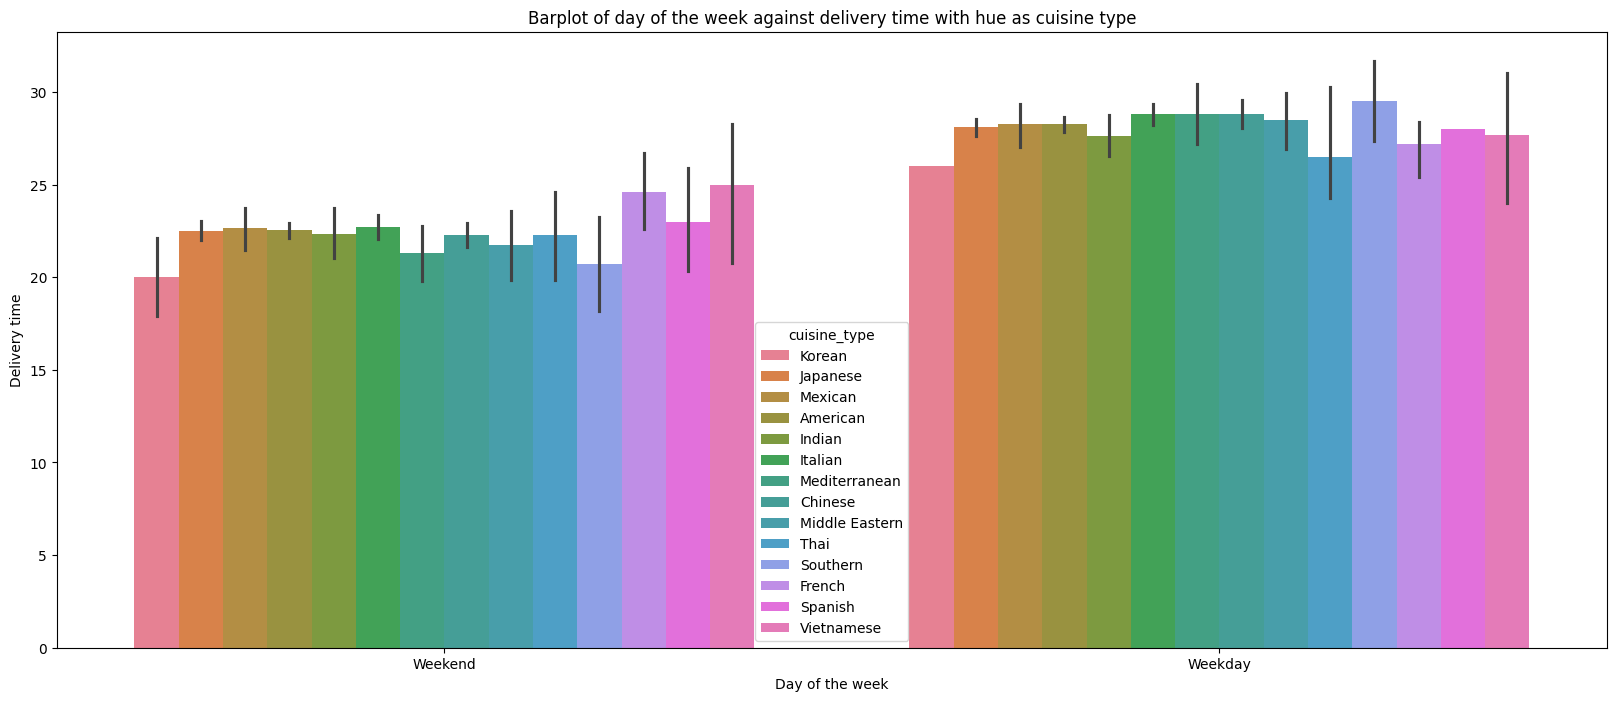

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['day_of_the_week'],y=df['delivery_time'],hue=df['cuisine_type'])
plt.title("Barplot of day of the week against delivery time with hue as cuisine type")
plt.xlabel("Day of the week")
plt.ylabel("Delivery time")
plt.show()

**Boxplot (Numerical - Categorical):**

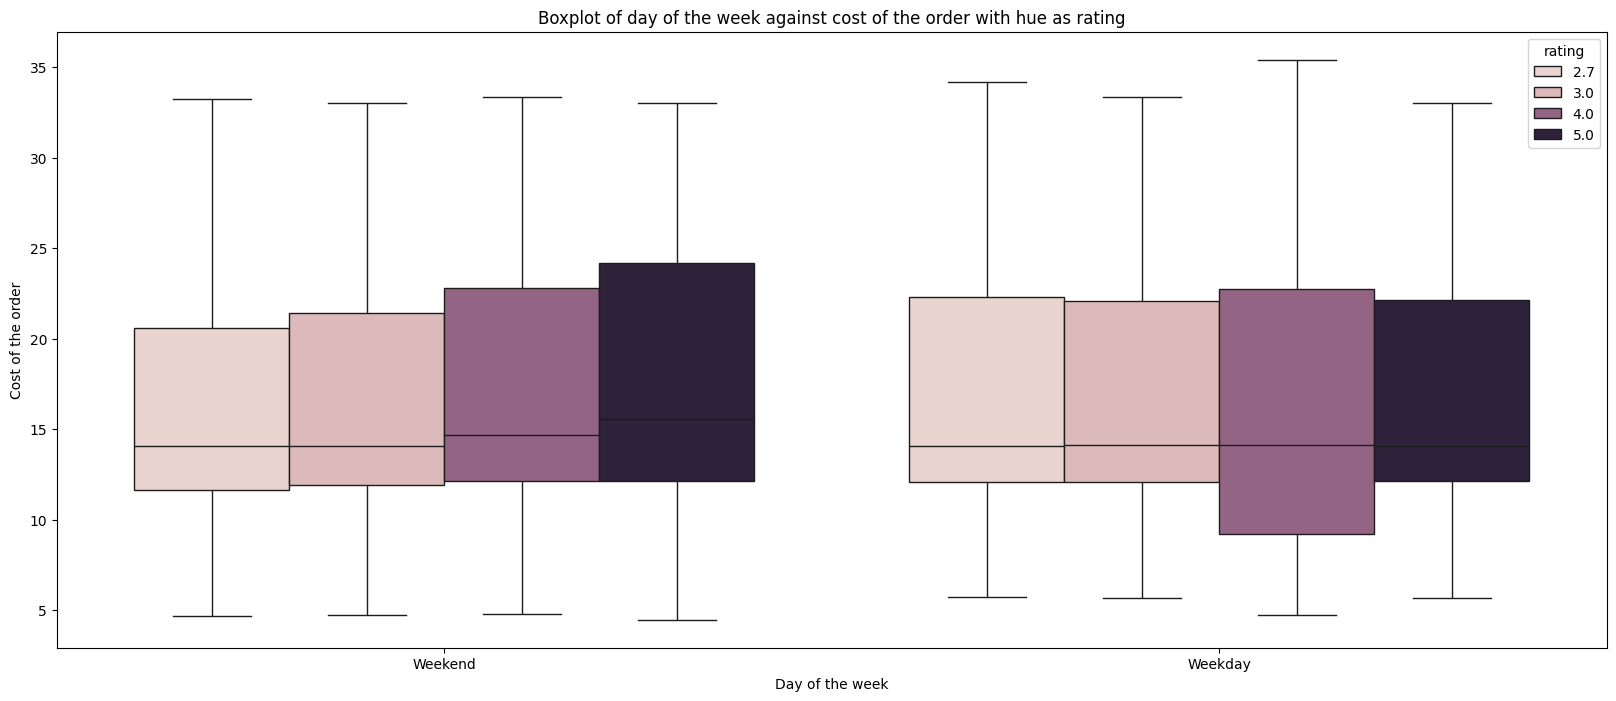

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(df,x=df['day_of_the_week'],y=df['cost_of_the_order'],hue=df['rating'])
plt.title("Boxplot of day of the week against cost of the order with hue as rating")
plt.xlabel("Day of the week")
plt.ylabel("Cost of the order")
plt.show()

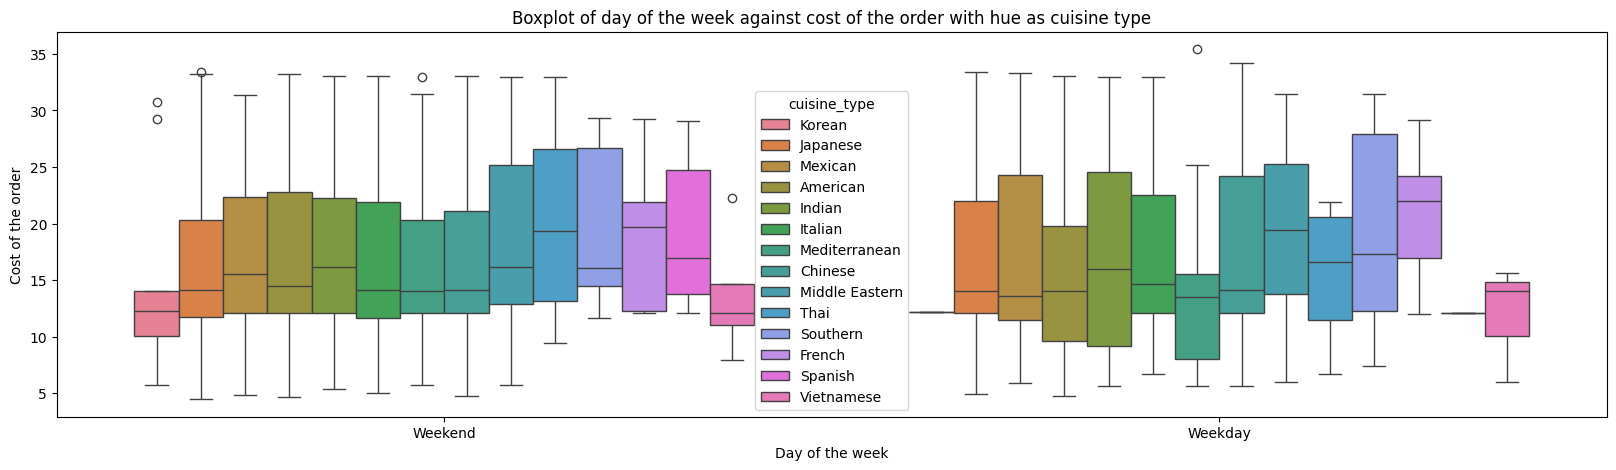

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x=df['day_of_the_week'],y=df['cost_of_the_order'],hue=df['cuisine_type'])
plt.title("Boxplot of day of the week against cost of the order with hue as cuisine type")
plt.xlabel("Day of the week")
plt.ylabel("Cost of the order")
plt.show()

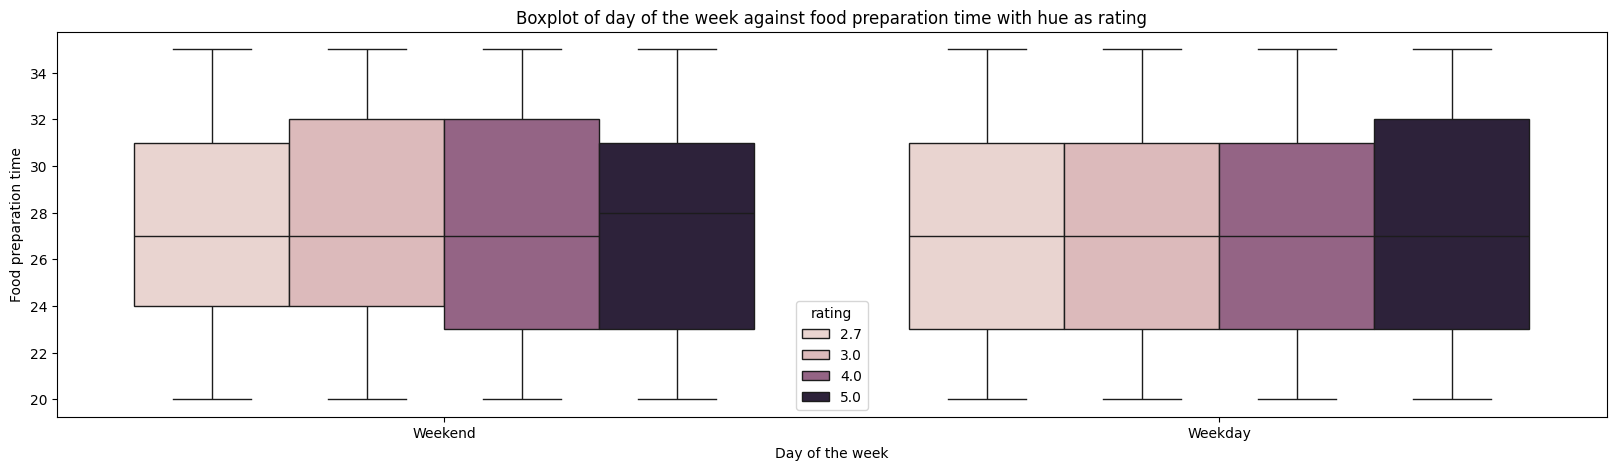

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x=df['day_of_the_week'],y=df['food_preparation_time'],hue=df['rating'])
plt.title("Boxplot of day of the week against food preparation time with hue as rating")
plt.xlabel("Day of the week")
plt.ylabel("Food preparation time")
plt.show()

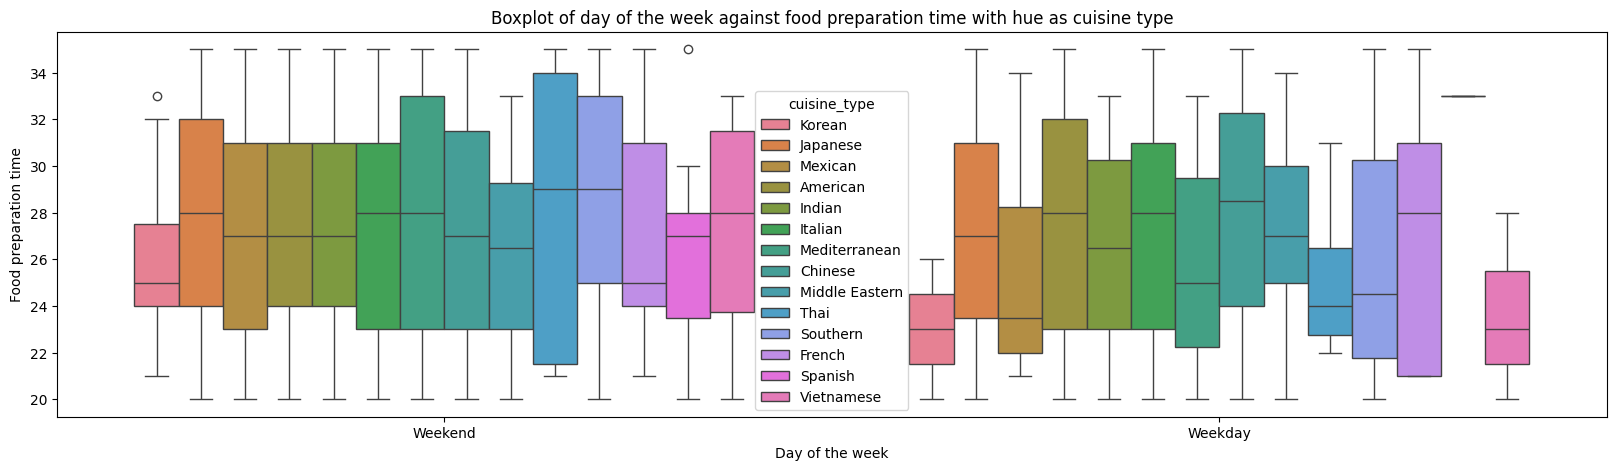

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x=df['day_of_the_week'],y=df['food_preparation_time'],hue=df['cuisine_type'])
plt.title("Boxplot of day of the week against food preparation time with hue as cuisine type")
plt.xlabel("Day of the week")
plt.ylabel("Food preparation time")
plt.show()

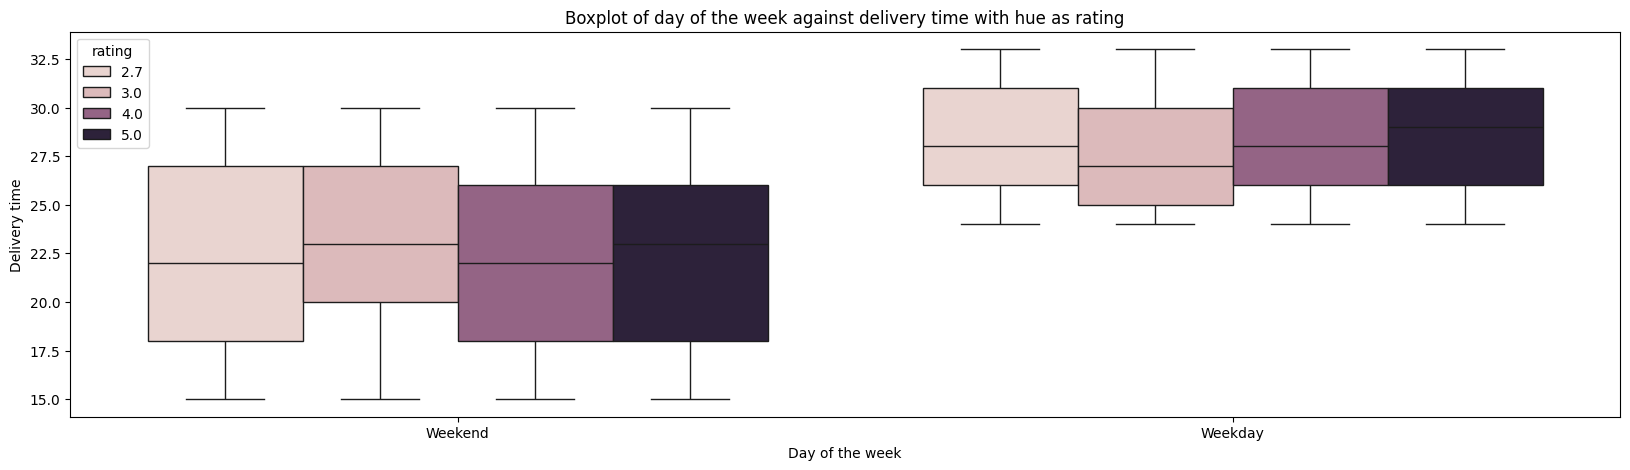

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x=df['day_of_the_week'],y=df['delivery_time'],hue=df['rating'])
plt.title("Boxplot of day of the week against delivery time with hue as rating")
plt.xlabel("Day of the week")
plt.ylabel("Delivery time")
plt.show()

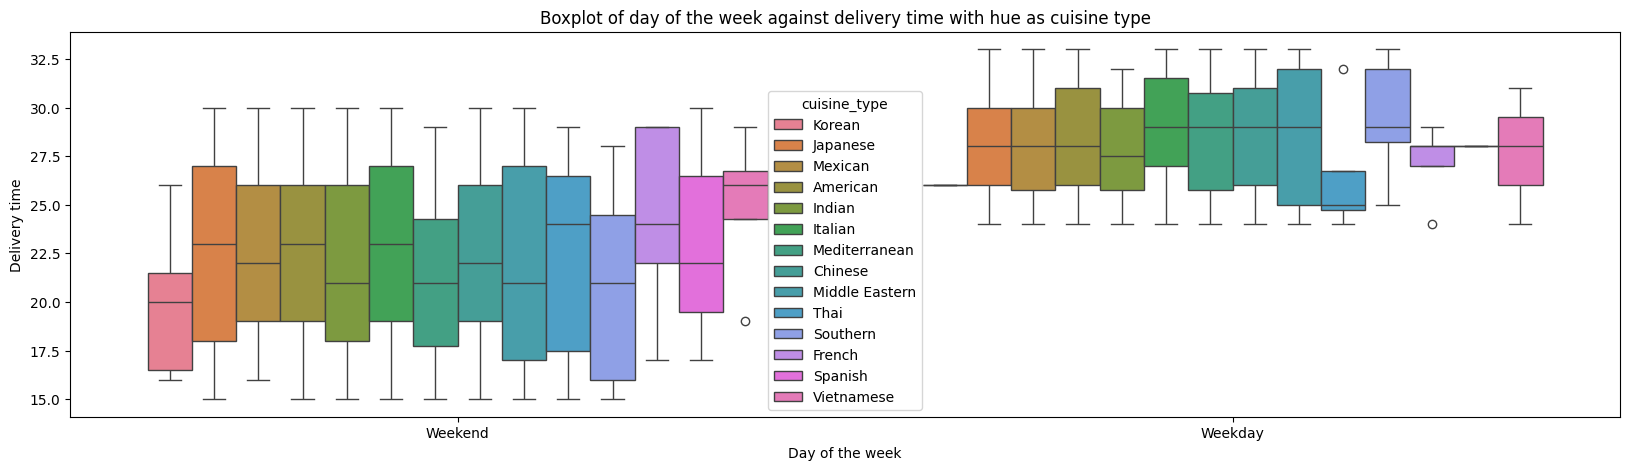

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x=df['day_of_the_week'],y=df['delivery_time'],hue=df['cuisine_type'])
plt.title("Boxplot of day of the week against delivery time with hue as cuisine type")
plt.xlabel("Day of the week")
plt.ylabel("Delivery time")
plt.show()

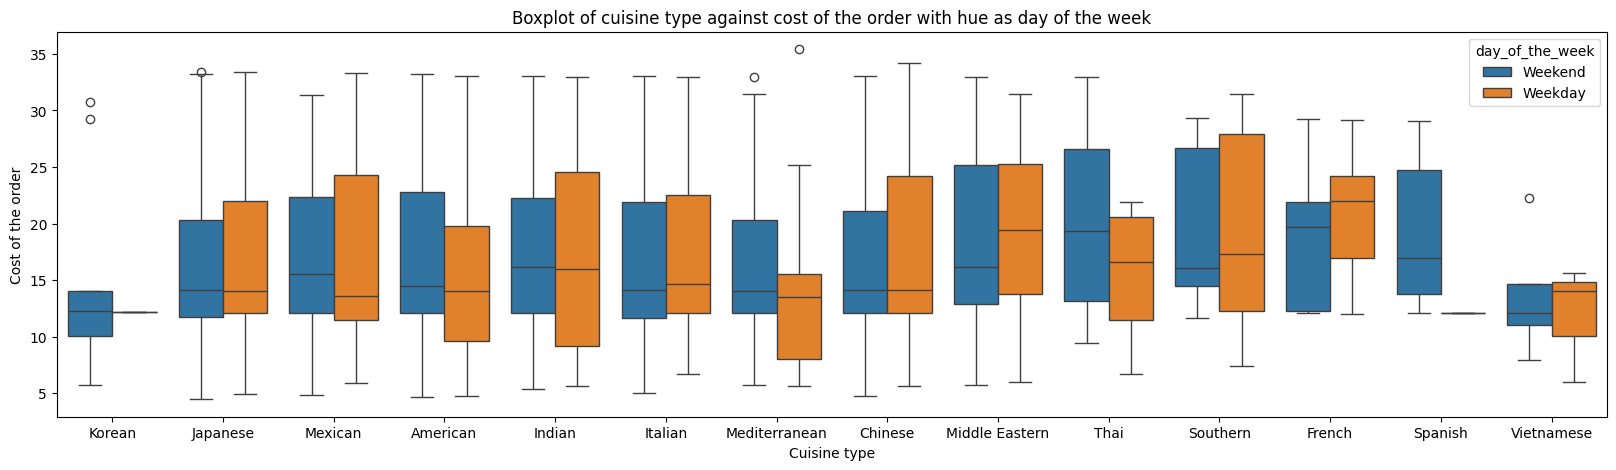

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x=df['cuisine_type'],y=df['cost_of_the_order'],hue=df['day_of_the_week'])
plt.title("Boxplot of cuisine type against cost of the order with hue as day of the week")
plt.xlabel("Cuisine type")
plt.ylabel("Cost of the order")
plt.show()

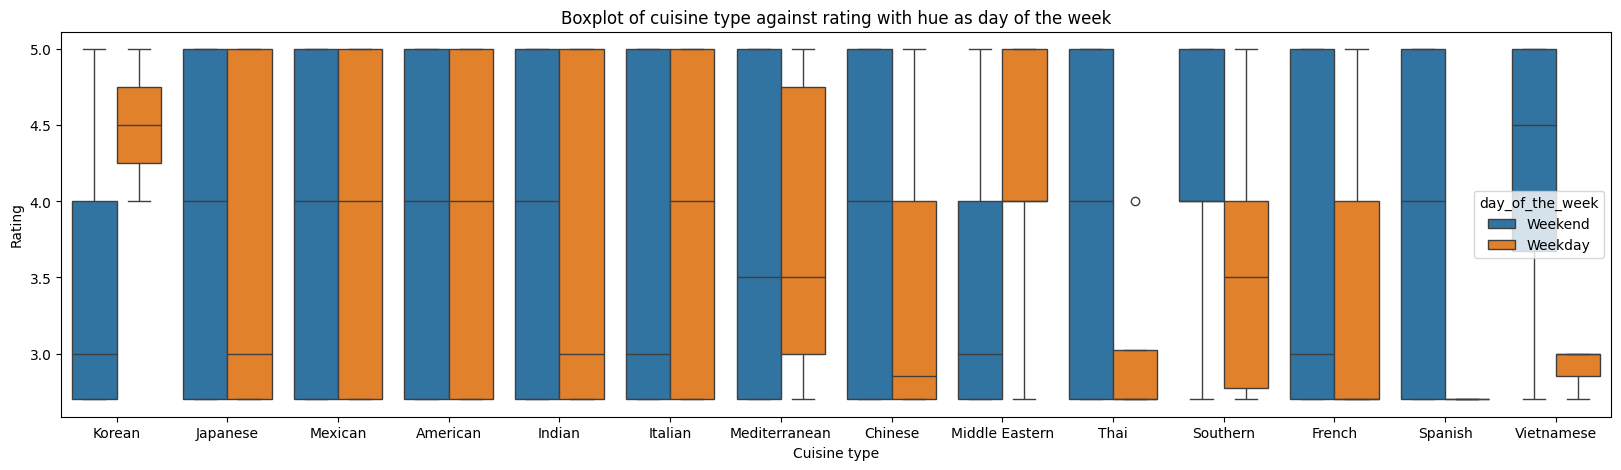

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x=df['cuisine_type'],y=df['rating'],hue=df['day_of_the_week'])
plt.title("Boxplot of cuisine type against rating with hue as day of the week")
plt.xlabel("Cuisine type")
plt.ylabel("Rating")
plt.show()

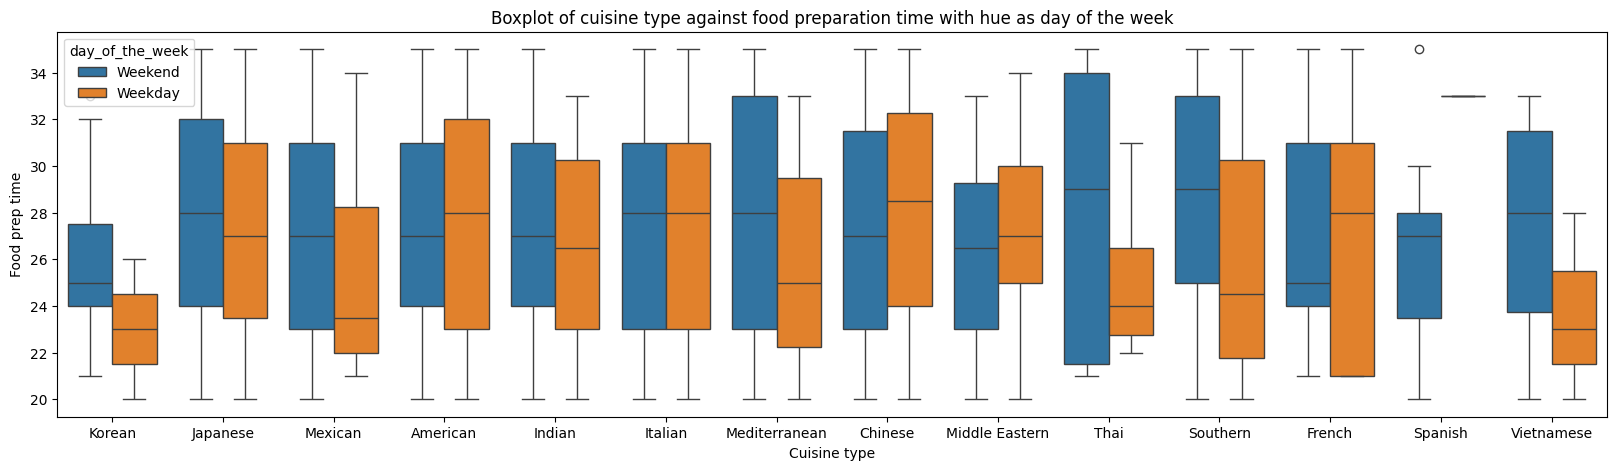

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x=df['cuisine_type'],y=df['food_preparation_time'],hue=df['day_of_the_week'])
plt.title("Boxplot of cuisine type against food preparation time with hue as day of the week")
plt.xlabel("Cuisine type")
plt.ylabel("Food prep time")
plt.show()

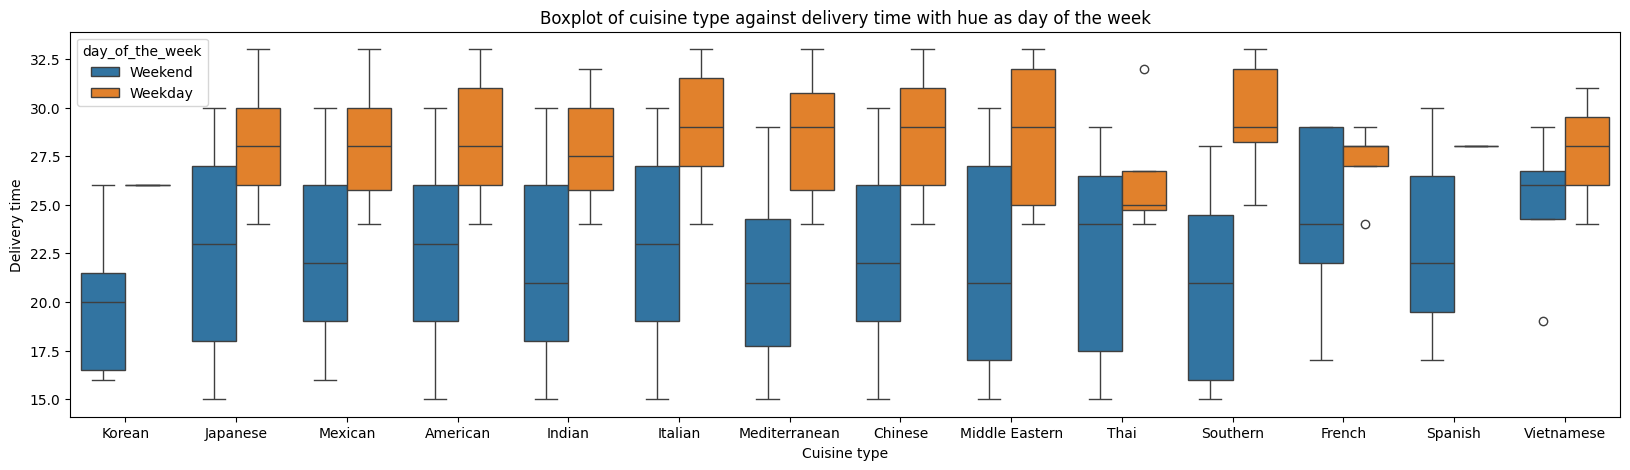

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x=df['cuisine_type'],y=df['delivery_time'],hue=df['day_of_the_week'])
plt.title("Boxplot of cuisine type against delivery time with hue as day of the week")
plt.xlabel("Cuisine type")
plt.ylabel("Delivery time")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
restaurants_fulfilling = df.groupby(['restaurant_name']).filter(lambda df: df['rating'].sum() > 50 and df['rating'].mean() > 4)

for i in restaurants_fulfilling['restaurant_name'].unique():
  print(i)

Hill Country Fried Chicken
J. G. Melon


#### Observations:
**Hill Country Fried Chicken** and **J. G. Melon** are the restaurants which **fulfill the above conditions for the promotional offer**.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
net_revn = (df['cost_of_the_order'] + 0.2*(df['cost_of_the_order']>20.00))+(df['cost_of_the_order'] + 0.15*(df['cost_of_the_order']>5.00))
print(f"Net revenue: {net_revn.sum()} dollars")

Net revenue: 63023.99 dollars


#### Observations:
The **net revenue** generated by the company across all orders is **63023.99 dollars**.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
df['total_time_of_prep'] = df['food_preparation_time']+df['delivery_time']
total_more_than_60m = df['total_time_of_prep'][df['total_time_of_prep']>60.00].count()
percentage_of_order_above_60m = np.round((total_more_than_60m/df['total_time_of_prep'].shape[0])*100,2)
f"{percentage_of_order_above_60m} % ."

'10.54 % .'

#### Observations:
The **percentage** of orders that take **more than 60 minutes** to get delivered from the time the order is placed is **10.54%**.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
np.round(df.groupby(['day_of_the_week'])['delivery_time'].mean(),2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Observations:
The **mean delivery time** is **28.34 mins** during **Weekdays** and **22.47 mins** during **Weekends.**

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  **10.54%** orders take **more than 60 minutes** to get delivered.

*  **Mean** delivery time during **Weekdays** is **28.34 mins** and during **Weekends** is **22.47 mins**.

*  **Top 5 restaurants** in terms of **number of orders received** are **Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm**.

*  **736** orders are **not-rated**.

*  **American** is the **most popular** cuisine on **weekends** and **weekdays**.

*  **29.24%** of the orders cost **more than 20 dollars**.

*  **24.16 mins** is the **mean** order delivery time.

### Recommendations:

*  **Optimize** delivery times as well as food preparation time. Do it especially on **crowdy days**.

*  Give **discounts** for the **top visited** restaurants and also **loyalty programs** for **customer retention**.

*  Give **coupons or cashbacks** to customers who **rated** their orders.

*  Give **combo offers** on other cuisines to get them at par with American cuisine.

*  **Advertise for other restaurants** so they get **exposed** to the customers as well.

---